We are going to talk about:

1. Point estimates: Point estimates are the estimates of the populaiton parameters from the sample data.  
2. Sampling distribution
3. Central Limit theoram: 
At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution. To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:
4. Confidence Interval
5. Hypothesis testing, pvalue: The role of p-value is used to check the validity of the null hypothesis.
6. Frequentist A/B testing
        6.1. Comparing two proportions
        6.2. Introducing power
        6.3. Determining Sample size
        6.4. 

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'


In [5]:
# setup the look and feel of the notebook
plt.rcParams['figure.figsize'] = 8, 6
sns.set_context('notebook', font_scale = 1.5, rc = {'lines.linewidth': 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')

# Create a couple of colors to use throughout the notebook
red = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

In [6]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 150000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 100000)
population_ages = np.concatenate((population_ages1, population_ages2))
print('population mean:', np.mean(population_ages))

population mean: 43.002372


In [17]:
np.random.seed(0)
sample_ages = np.random.choice(population_ages, size = 500)
print('sample mean:', np.mean(sample_ages))

sample mean: 43.55


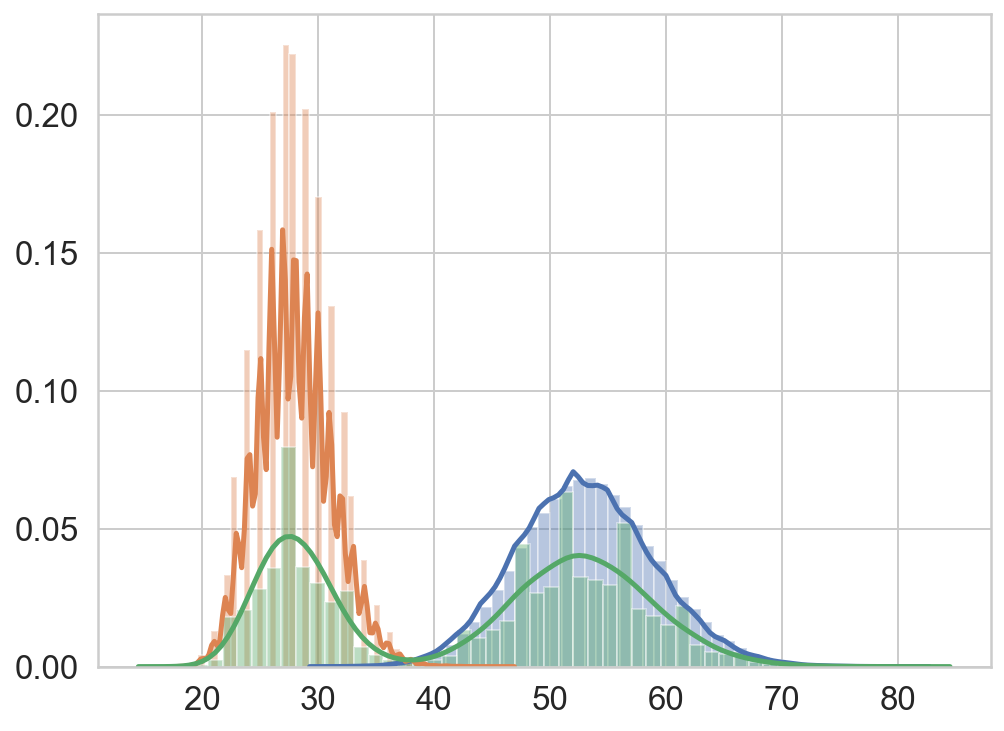

In [23]:
sns.distplot(population_ages1)
sns.distplot(population_ages2)
sns.distplot(population_ages)

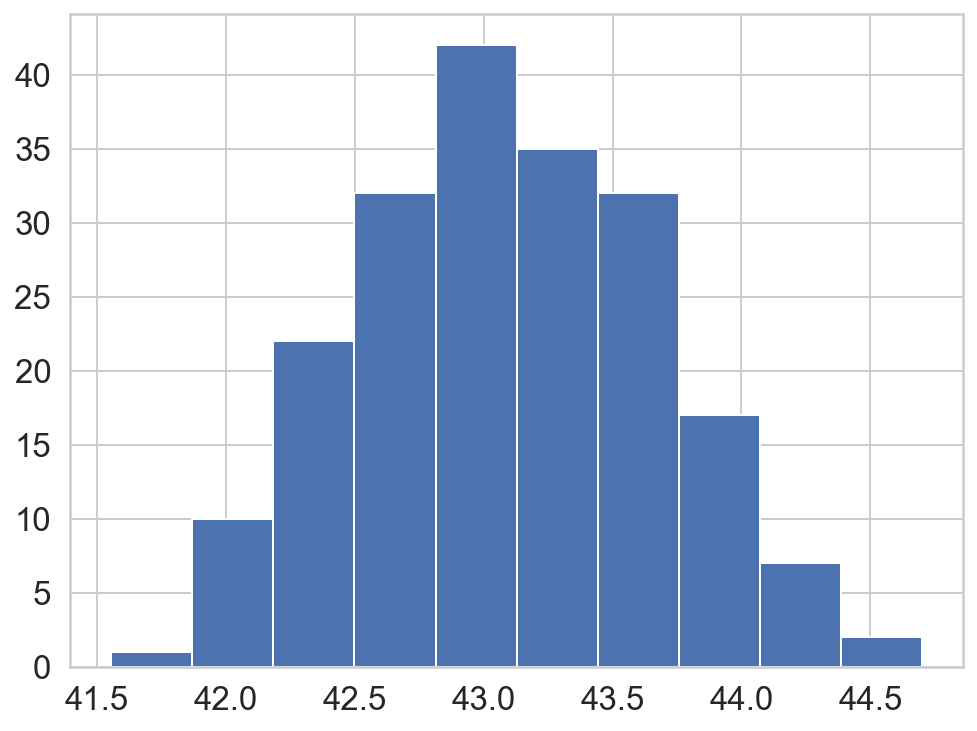

In [15]:
np.random.seed(10)
samples = 200
point_estimates = [np.random.choice(population_ages, size = 500).mean()
                   for _ in range(samples)]

plt.hist(point_estimates)
plt.show()


In [18]:
population_ages.mean() - np.mean(point_estimates)

-0.08440799999999626

### Central limit theoram

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from.

Central limit theoram states that if we collect large number of sample means from the population, the sampling distribution, the distribution ofsample means will approximately take the shape of normal distribution around the population mean. 

In [19]:

sample_size = 1000
sample = np.random.choice(population_ages, size = sample_size)
sample_mean = sample.mean()

confidence = 0.95
z_critical = stats.norm.ppf(q = confidence + (1 - confidence) / 2)
print('z-critical value:', z_critical)                     

pop_stdev = population_ages.std()
margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
confint = sample_mean - margin_of_error, sample_mean + margin_of_error
print('point esimate:', sample_mean)
print('Confidence interval:', confint)

z-critical value: 1.959963984540054
point esimate: 42.523
Confidence interval: (41.70306406882683, 43.34293593117317)


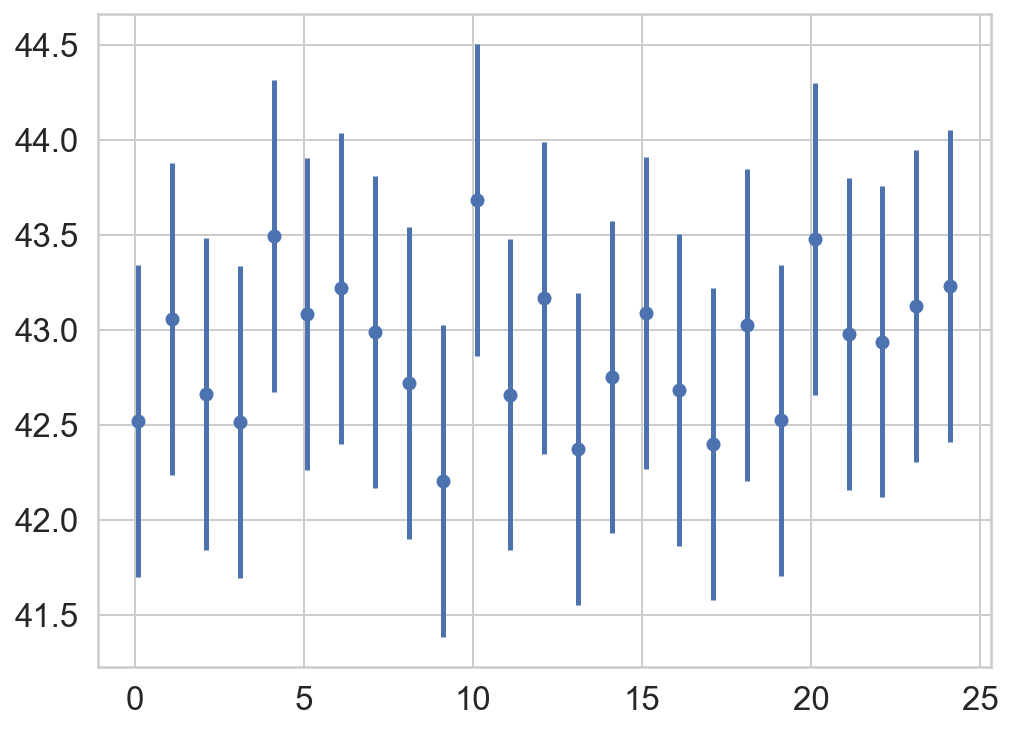

In [20]:
np.random.seed(10)
confidence = 0.95
sample_size = 1000

sample_means = []
intervals = []
for sample in range(25):
    sample = np.random.choice(population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    z_critical = stats.norm.ppf(q = confidence + (1 - confidence) / 2)
    pop_stdev = population_ages.std()
    margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
    confint = sample_mean - margin_of_error, sample_mean + margin_of_error
    intervals.append(confint)
    
plt.figure()
plt.errorbar(x = np.arange(0.1, 25, 1), y = sample_means, 
             yerr = [(top - bot) / 2 for top, bot in intervals], fmt = 'o')
plt.show()

The  (nk)  tells us how many ways are there to get  k  heads our of  n  total number of coin flips?" and the  pk(1−p)n−k  answers the question "how likely is any given  k  heads and  n−k  tails?", multiply them together and we get the probability of getting exactly  k  heads.

Now that we understand the classic method, let's use it to test whether we are actually tossing a fair coin.

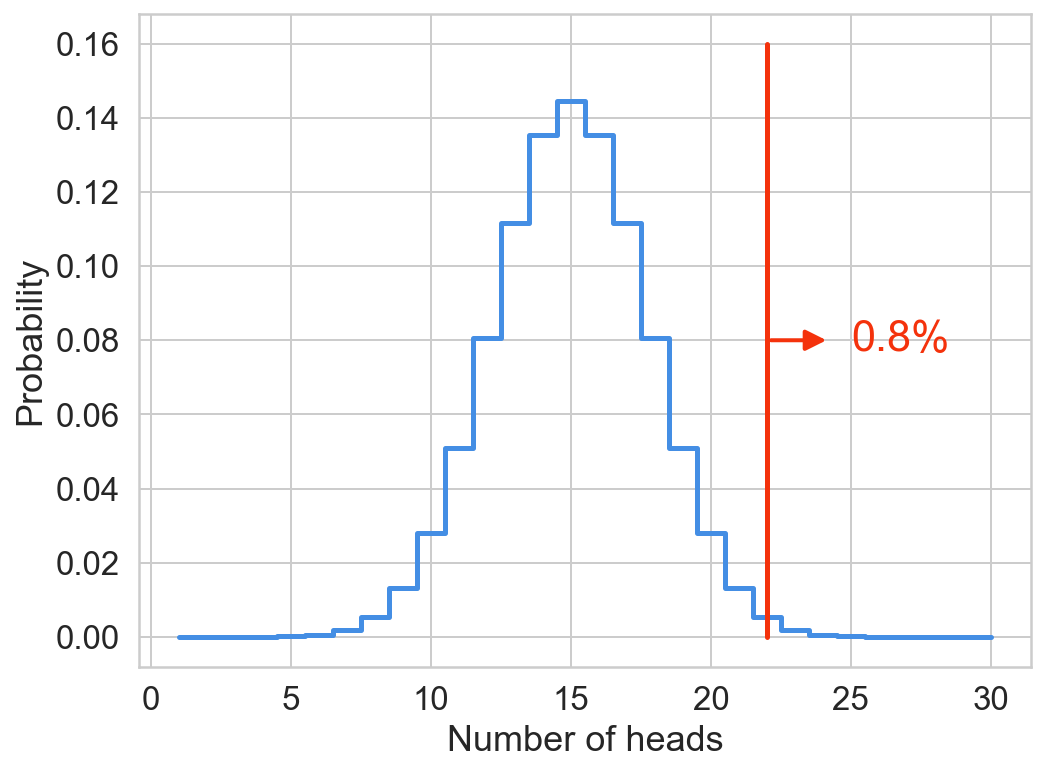

In [24]:
# Calculate the probability for every possible outcome
# of tossing a fair coin 30 k_range

k_range = range(1, 31)  # number of heads appearing
n = 30  # number of k_range tossing the coin
p = 0.5  # probability of coin appearing up as head

prob = stats.binom(n = n, p = p).pmf(k = k_range)

# Plot the probability distribution using the probabilities list 
# we created above.
plt.step(k_range, prob, where = 'mid', color = blue)
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.plot((22, 22), (0, 0.1599), color = red)
plt.annotate('0.8%', xytext = (25, 0.08), xy = (22, 0.08), 
             va = 'center', color = red, size = 'large',
             arrowprops = {'arrowstyle': '<|-', 'lw': 2,
                           'color': red, 'shrinkA': 10})
plt.show()

The visualization above shows the probability distribution for flipping a fair coin 30 times. Using this visualization we can now determine the probability of getting, say for example, 12 heads in 30 flips, which looks to be about 8%. Notice that we've labeled our example of 22 heads as 0.8%. If we look at the probability of flipping exactly 22 heads, it looks likes to be a little less than 0.8%, in fact if we calculate it using the function from above, we get 0.5%.

In [25]:
prob = stats.binom(n = n, p = p).pmf(k = 22)
print('Probability of flipping 22 heads: {:0.1f}%'.format(prob * 100))

Probability of flipping 22 heads: 0.5%


What is 0.8 in the visualization above representing: that's because we are showing the probability of getting at least 22 heads, which is also known as the p-value.

Frequentist statistic's hypothesis testing uses a p-value to weigh the strength of the evidence (what the data is telling you about the population). p-value is defined as the probability of obtaining the observed or more extreme outcome, given that the null hypothesis is true (not the probability that the alternative hypthesis is true). It is a number between 0 and 1 and interpreted in the following way:

1. A small p-value (typically <= 0.05, 0.05 is a commonly used threshold, the threshold is often denoted as  α ) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. This means that something interesting is going on and it’s not just noise!
2. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis. Although p-value is still in our favor, we cannot conclusively say that it was not due to random noise.
3. p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). If you carefully read good papers on these kind of topics, you will always see the p-values being reported so that the readers can draw their own conclusions.


### Example:

Null hypothesis: mean delivery time is 30 minutes maximum

we are conducting the hypothesis test because we believe tha the null hypothesis is incorrect. We randomly sample some delivery times and run the data through the hypothesis test, and our p-value turns out to be 0.01, which is much less than 0.05. we are conducting the hypothesis test because we believe tha the null hypothesis is incorrect. We randomly sample some delivery times and run the data through the hypothesis test, and our p-value turns out to be 0.01, which is much less than 0.05. 

The role of p-value is to test the validity of null hypothesis.

In [26]:
def compute_pval(n, k, p):
    "returns the p value for bunomial distribution"
    k_range = range(k, n+1)
    pvalue = stats.binom(n = n, p = p).pmf(k = k_range).sum()
    return pvalue
pvalue = compute_pval(30,22,0.5)
print(pvalue)

0.008062400855123929


In [ ]:
stats.binom(n = n, p = p).pmf(k = k_range)

In [28]:
data = pd.DataFrame({
    'version': ['A', 'B'],
    'not_converted': [4514, 4473],
    'converted': [486, 527]
})[['version', 'not_converted', 'converted']]
data

,version,not_converted,converted
0,A,4514,486
1,B,4473,527
